**Libraries Imported**

In [49]:
import os
import json
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

**Kaggle environment setup**

In [3]:
kaggle_dict = json.load(open("kaggle.json"))

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_dict['username']
os.environ['KAGGLE_KEY'] = kaggle_dict['key']

In [5]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 39% 10.0M/25.7M [00:00<00:00, 95.2MB/s]
100% 25.7M/25.7M [00:00<00:00, 148MB/s] 


In [6]:
with ZipFile('/content/imdb-dataset-of-50k-movie-reviews.zip', 'r') as file:
  file.extractall()

**Loading Dataset**

In [7]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.shape

(50000, 2)

In [10]:
count = df['sentiment'].value_counts()

In [11]:
count

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

**Visualizing Dataset count**

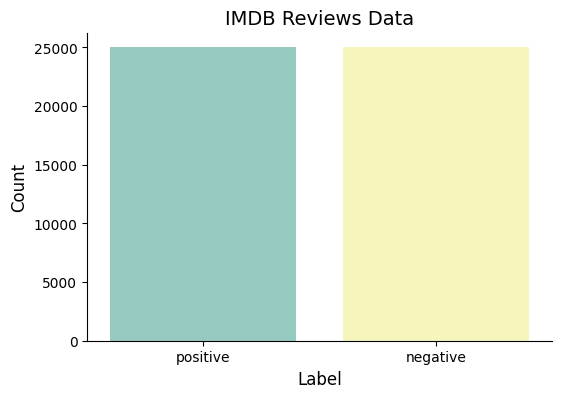

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], hue=df['sentiment'], palette='Set3', legend=False)
plt.title("IMDB Reviews Data", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
df.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [15]:
X = df['review']
y = df['sentiment']

**Splitting Training and Testing Data**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [17]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (40000,)
X_test shape:  (10000,)
y_train shape:  (40000,)
y_test shape:  (10000,)


**Data Preprocessing**

Stopwords removal

In [18]:
# Define stopwords
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply function to remove stopwords
reviews_no_stopwords = [remove_stopwords(review) for review in df['review']]

In [19]:
reviews_no_stopwords[0]

"One reviewers mentioned watching 1 Oz episode hooked. right, exactly happened me.<br /><br />The first thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.<br /><br />It called OZ nickname given Oswald Maximum Security State Penitentary. focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.<br /><br />I would say main appeal show due fact goes shows dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste Oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold

Getting the most frequent word and its frequency

In [20]:
# Initialize the Tokenizer without limiting the number of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews_no_stopwords)

# Access the word counts
word_counts = tokenizer.word_counts

# Convert the word_counts dictionary to a list of tuples and sort it
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=False)

# Print the sorted word counts
print("Word counts in sorted order (most frequent first):")
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

Streaming output truncated to the last 5000 lines.
dresses: 160
tomorrow: 160
landscapes: 160
sunshine: 160
daddy: 160
orange: 160
tap: 160
unfold: 160
seldom: 160
advanced: 160
nerd: 160
women's: 160
cary: 160
other's: 160
exploration: 160
acid: 160
prom: 160
pal: 161
mundane: 161
blast: 161
plight: 161
retired: 161
objects: 161
ordered: 161
disliked: 161
harm: 161
regarded: 161
mayhem: 161
questionable: 161
access: 161
crawford: 161
confess: 161
beware: 161
dvds: 161
uplifting: 161
niro: 161
widely: 161
1971: 161
streisand: 161
masses: 162
grotesque: 162
spaghetti: 162
kenneth: 162
laws: 162
stale: 162
awfully: 162
resources: 162
severely: 162
balls: 162
rude: 162
fifth: 162
imitation: 162
humble: 162
muppet: 162
compelled: 162
50s: 162
catchy: 162
shoulder: 162
conscious: 162
pig: 162
manipulative: 162
creator: 163
aids: 163
raises: 163
exposure: 163
blacks: 163
surfing: 163
receives: 163
clip: 163
purple: 163
austen: 163
sink: 163
metaphor: 163
showdown: 163
custer: 163
pursuit: 16

In [21]:
print('Most frequent word:', sorted_word_counts[::-1][1][0])
print('Frequency:', sorted_word_counts[::-1][1][1])

Most frequent word: movie
Frequency: 87059


Getting length of the tokenized sequence

In [23]:
# Calculate lengths of tokenized sequences
review_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(df['review'])]

In [24]:
# Print summary statistics
print(f"Mean length: {np.mean(review_lengths)}")
print(f"Median length: {np.median(review_lengths)}")
print(f"Max length: {np.max(review_lengths)}")

Mean length: 235.00346
Median length: 176.0
Max length: 2493


Tokenizing the Data

In [25]:
tokenizer = Tokenizer(num_words = 87059)
tokenizer.fit_on_texts(df['review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=250)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=250)

In [26]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (40000, 250)
X_test shape (10000, 250)


**Model Architecture**

In [32]:
model = Sequential()
model.add(Embedding(input_dim=87059, output_dim=128, input_length=250))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          11143552  
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 11308417 (43.14 MB)
Trainable params: 11308417 (43.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training the model**

In [35]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 281s 554ms/step - loss: 0.3872 - accuracy: 0.8217 - val_loss: 0.3196 - val_accuracy: 0.8735
Epoch 2/5
500/500 [==============================] - 280s 559ms/step - loss: 0.1809 - accuracy: 0.9337 - val_loss: 0.3823 - val_accuracy: 0.8806
Epoch 3/5
500/500 [==============================] - 277s 555ms/step - loss: 0.1005 - accuracy: 0.9646 - val_loss: 0.4190 - val_accuracy: 0.8565
Epoch 4/5
500/500 [==============================] - 272s 543ms/step - loss: 0.0683 - accuracy: 0.9772 - val_loss: 0.4561 - val_accuracy: 0.8709
Epoch 5/5
500/500 [==============================] - 273s 547ms/step - loss: 0.0592 - accuracy: 0.9789 - val_loss: 0.5269 - val_accuracy: 0.8565


**Visualizing Model Accuracy and Loss**

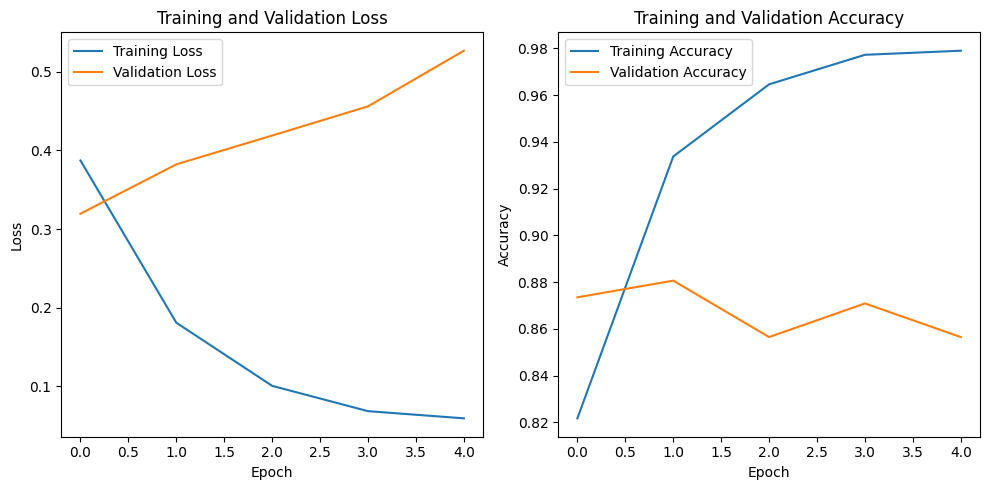

In [36]:
# Extracting training/validation loss and accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Creating a figure
plt.figure(figsize=(10, 5))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


**Getting the accuracy of the model on the testing data**

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 29s 90ms/step - loss: 0.5125 - accuracy: 0.8619
Test Loss: 0.5124958753585815
Test Accuracy: 0.8618999719619751


In [41]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Thresholding probabilities to obtain binary predictions

313/313 [==============================] - 33s 105ms/step


**Classification Report**

In [44]:
# Generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      5000
           1       0.82      0.92      0.87      5000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



**Confusion Matrix**

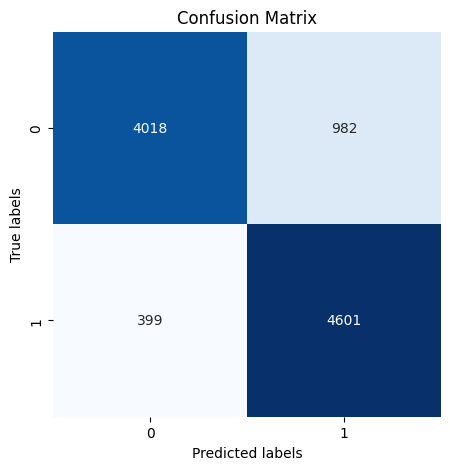

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Saving the Data**

In [50]:
dump(model, 'model.joblib')

['model.joblib']